In [2]:
# import statements
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR

In [155]:
X = pd.read_csv('drug_properties_final.csv', header=0, usecols=range(1,16))
print(X.head(5))
nsamples, nfts = X.shape
print(nsamples)
print(nfts)

     0    1    2      3    4           5    6    7     8    9     10  \
0  1.0  0.0  0.0  734.0  1.0  344.089603  7.0  3.0  25.0  0.0  344.3   
1  1.0  0.0  0.0  633.0  1.0  354.183109  4.0  1.0  26.0  0.0  354.4   
2  1.0  0.0  0.0  497.0  1.0  292.121178  3.0  1.0  22.0  0.0  292.3   
3  0.0  0.0  0.0  780.0  1.0  518.194068  8.0  6.0  38.0  0.0  518.6   
4  2.0  0.0  0.0  415.0  1.0  301.179027  3.0  3.0  22.0  0.0  301.4   

           11   12     13   14  
0  344.089603  2.0  121.0  2.1  
1  354.183109  8.0   71.4  4.4  
2  292.121178  1.0   52.9  2.4  
3  518.194068  5.0  156.0  6.9  
4  301.179027  2.0   68.4  2.3  
1784
15


In [19]:
drugs = pd.read_csv('drug_name_list_final.csv', header=0, usecols=range(1,2))
drugs

,0
0,(+)-Usniacin
1,"(+-)-7-(3,5,6-trimethyl-1,4-benzoquinon-2-yl)-..."
2,(-)-Blebbistatin
3,(-)-Gossypol
4,(-)-Indolactam V
5,1-alpha-Hydroxyergocalciferol
6,10-Deacetylbaccatin
7,10-hydroxycamptothecin
8,10058-F4
9,10074-G5


In [23]:
drugs_with_resp_auc_data = pd.read_csv('drugs.csv', usecols = range(1,2))
drugs_with_resp_auc_data

,0
0,"""6-Bromoindirubin-3'-acetoxime"""
1,(+)-Usniacin
2,"(+-)-7-(3,5,6-trimethyl-1,4-benzoquinon-2-yl)-..."
3,(-)-Blebbistatin
4,(-)-Gossypol
5,(-)-Indolactam V
6,1-alpha-Hydroxyergocalciferol
7,10-Deacetylbaccatin
8,10-hydroxycamptothecin
9,10058-F4


In [64]:
#idx = [drugs_with_resp_auc_data.index[drugs_with_resp_auc_data.iloc[:,0] == x] for x in drugs.iloc[:,0]]

indexes = []
counter = 0
for drug in drugs_with_resp_auc_data.iloc[:,0]:
    print(drug)
    if drug in list(drugs.iloc[:,0]):
        print('hello')
        indexes.append(counter)
    counter = counter + 1
indexes

"6-Bromoindirubin-3'-acetoxime"
(+)-Usniacin
hello
(+-)-7-(3,5,6-trimethyl-1,4-benzoquinon-2-yl)-7-phenylheptanoic acid
hello
(-)-Blebbistatin
hello
(-)-Gossypol
hello
(-)-Indolactam V
hello
1-alpha-Hydroxyergocalciferol
hello
10-Deacetylbaccatin
hello
10-hydroxycamptothecin
hello
10058-F4
hello
10074-G5
hello
16,16-dimethyl PGE2
hello
17 alpha-propionate
hello
17-Methyltestosterone
hello
17_-hydroxy Wortmannin
2',3'-Dideoxyinosine
hello
2-Deoxyglucose
2-Ethylhexyl-2-cyano-3,3-diphenylacrylate
2-Fluoroadenosine
hello
2-Iminobiotin
hello
2-Methoxyestradiol
hello
20-hydroxyecdysone
hello
3-Bromopyruvate
hello
3-Methyladenine
hello
3-indolebutyric acid
hello
339253
4',7-Dihydroxyisoflavanone
hello
4-Demethylepipodophyllotoxin
hello
4-Hydroxyandrostenedione
hello
4-Quinazolinamine
hello
4-methylumbelliferone
hello
5,7-Dihydroxyflavone
hello
5-Azacitidine
hello
5-Hydroxytryptophan
hello
6-mercaptopurine
hello
7-Aminocephalosporanic acid
hello
7-Hydroxystaurosporine
hello
705498
8-Cl-Ado
hel

IRAK-1-4 Inhibitor I
hello
ISOX
ITD-1
hello
ITF2357 (Givinostat)
hello
ITK inhibitor
hello
ITX3
hello
IVX-214
hello
IWP-2
hello
Ibandronate sodium hydrate
hello
Ibuprofen lysine
hello
Ibutamoren mesilate
hello
Ibutilide fumarate
hello
Icariin
hello
Icaritin
hello
Idarubicin hydrochloride
hello
Idebenone
hello
Idoxuridine
hello
Idronoxil
hello
Ifomide
Iloperidone
hello
Imatinib
hello
Imexon
hello
Imipenem
hello
Imiquimod
hello
Indapamide
hello
Indibulin
hello
Indinavir sulfate
hello
Indiplon
hello
Indirubin
hello
Indomethacin
hello
Indoximod
hello
Ingenol mebutate
hello
Iniparib
hello
Ipratropium bromide hydrate
hello
Ipriflavone
hello
Irestatin 9389
hello
Irinotecan
hello
Irsogladine maleate
hello
Isepamicin
hello
Isoconazole nitrate
hello
Isoliquiritigenin
hello
Isoniazid
hello
Isoproterenol
hello
Isotretinoin
hello
Ispinesib
hello
Isradipine
hello
Istradefylline
hello
Itraconazole
hello
Ivabradine hydrochloride
hello
Ivacaftor
hello
Ivachtin
hello
Ixazomib citrate
hello
J113397
hello

hello
Tamsulosin hydrochloride
hello
Tandutinib
hello
Tanespimycin
hello
Tanshinone I
hello
Tanshinone IIA
hello
Tariquidar
hello
Taxifolin
hello
Tazarotene
hello
Tebipenem pivoxil
hello
Tegafur
hello
Tegaserod maleate
hello
Teicoplanin
hello
Telaprevir
hello
Telatinib
hello
Telbivudine
hello
Telithromycin
hello
Telmisartan
hello
Telotristat etiprate
hello
Temocapril hydrochloride
hello
Temozolomide
hello
Tempol
hello
Temsirolimus
hello
Teniposide
hello
Tenofovir disoproxil fumarate
hello
Tenoxicam
hello
Terameprocol
hello
Terazosin hydrochloride
hello
Terbinafine hydrochloride
hello
Teriflunomide
hello
Tesmilifene hydrochloride
hello
Testosterone
hello
Testosterone cypionate
hello
Testosterone propionate
hello
Tetrabenazine
hello
Tetracycline hydrochloride
hello
Tetrahydroberberine
hello
Tetrahydropapaverine
hello
Tetrahydrouridine
hello
Tetrandrine
hello
Thalidomide
hello
Thapsigargin
hello
Theobromine
hello
Theophyllamine
hello
Thiabendazole
hello
Thiamphenicol
hello
Thiazovivin
hel

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 15,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 19

In [72]:
auc_values = pd.read_csv('auc.csv')
auc_values = auc_values.iloc[:,1:7]
print(auc_values.head(5))
maxresp_values = pd.read_csv('max_resp.csv')
maxresp_values = maxresp_values.iloc[:,1:7]
print(maxresp_values.head(5))


         0        1        2        3        4        5
0  428.792  460.119  277.164  443.183  408.479  408.348
1  466.491  494.689  477.969  580.252  445.541  490.083
2  413.997  261.922  438.649  360.282  417.510  322.348
3  473.658  514.225  391.226  472.357  455.033  483.530
4  499.085  454.862  284.317  498.955  490.830  436.067
         0        1       2        3       4        5
0   31.627   50.723  39.010   62.477  53.749   73.943
1  104.528  106.693  94.311  120.259  79.373  105.277
2   94.854   15.955  91.379   82.129  87.158   66.432
3   63.828   74.488  49.955  101.986  88.269   92.542
4    5.796    8.253  14.334   89.583  72.228   47.565


In [77]:
final_drugs = drugs_with_resp_auc_data.iloc[indexes,0]
final_drugs

final_auc = auc_values.iloc[indexes,0]
print(final_auc)


final_maxresp = maxresp_values.iloc[indexes,0]
print(final_maxresp)

1       466.491
2       413.997
3       473.658
4       499.085
5       439.192
6       444.042
7       453.739
8       248.701
9       468.376
10      479.920
11      508.541
12      460.677
13      558.791
15      480.426
18      285.296
19      471.813
20      464.425
21      493.138
22      507.789
23      249.042
24      488.652
26      551.776
27      344.194
28      469.655
29      530.880
30      495.816
31      531.945
32      482.464
33      515.136
34      429.511
         ...   
1875    431.896
1876    484.263
1877    466.555
1878    417.993
1879    393.811
1880    434.189
1881    509.722
1882    476.023
1883    483.136
1884    534.539
1885    473.961
1886    499.552
1887    497.714
1888    518.135
1889    521.301
1890    509.852
1891    571.867
1892    510.624
1893    518.613
1894    511.656
1895    495.874
1896    527.247
1897    454.960
1898    407.638
1899    547.131
1900    494.093
1901        NaN
1902    451.037
1903    458.061
1904    456.794
Name: 0, Length: 1784, d

In [ ]:
# plot correlation between auc and max resp

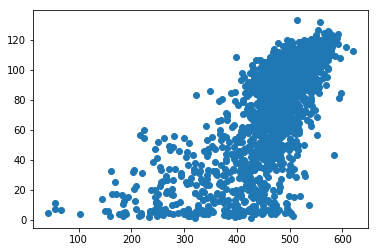

In [79]:
plt.scatter(final_auc, final_maxresp)

In [156]:
print(sum(np.isnan(X)))
X
print(sum(X > 10000))
print(sum(np.isinf(X)))

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [157]:
#X.fillna(-1, inplace=True) 
X[X==np.inf]=np.nan
np.where(X.values >= np.finfo(np.float32).max)
X = np.nan_to_num(X)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater_equal
  This is separate from the ipykernel package so we can avoid doing imports until


In [158]:
print(sum(np.isnan(X)))
X
print(sum(X > 10000))
print(sum(np.isinf(X)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [163]:
final_auc = np.nan_to_num(final_auc)
sum(np.isnan(final_auc))

0

In [181]:
print(sum(np.isnan(final_maxresp)))
final_maxresp = np.nan_to_num(final_maxresp)
print(sum(np.isnan(final_maxresp)))

1
0


In [182]:
# Using Skicit-learn to split data into training and testing sets
# Split the data into training and testing sets
train_ft_auc, test_ft_auc, train_lab_auc, test_lab_auc = train_test_split(X, final_auc, test_size = 0.3, random_state = 0)
train_ft_resp, test_ft_resp, train_lab_resp, test_lab_resp = train_test_split(X, final_maxresp, test_size = 0.3, random_state = 0)


In [81]:
# compute metrics
def compute_regression_metrics(y_true_labels, y_pred_labels): 
    r2 = sklearn.metrics.r2_score(y_true_labels, y_pred_labels)
    mae = sklearn.metrics.mean_absolute_error(y_true_labels, y_pred_labels)
    mse = sklearn.metrics.mean_squared_error(y_true_labels, y_pred_labels)
    expl_var = sklearn.metrics.explained_variance_score(y_true_labels, y_pred_labels)

    print("R2: ", r2)
    print("MAE: ", mae)
    print("MSE: ", mse)
    print("Explained Variance: ", expl_var)

## Part A: Random Forest Regressor

In [167]:
clf = RandomForestRegressor(n_estimators=1000, random_state=0, oob_score = True)
clf.fit(train_ft_auc, train_lab_auc)  
y_pred=clf.predict(test_ft_auc)
print("Prediction metrics")
compute_regression_metrics(test_lab_auc, y_pred)

Prediction metrics
R2:  0.058989055910362076
MAE:  54.994847517472365
MSE:  5931.334072612806
Explained Variance:  0.05920914402044308


In [172]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
fts = pd.read_csv('val_names.csv')
fts = fts.iloc[:,1]
print(fts)

0         atom_stereo_count
1         bond_stereo_count
2                    charge
3                complexity
4       covalent_unit_count
5                exact_mass
6     h_bond_acceptor_count
7        h_bond_donor_count
8          heavy_atom_count
9        isotope_atom_count
10         molecular_weight
11        monoisotopic_mass
12       rotable_bond_count
13                     tpsa
14                    xlogp
Name: 0, dtype: object


In [175]:
# Print the feature ranking
print("Feature ranking:")

for f in range(len(fts)):
    print("%d. %s has feature importance %f" % (f + 1, fts[indices[f]], importances[indices[f]]))

Feature ranking:
1. complexity has feature importance 0.159060
2. tpsa has feature importance 0.145126
3. xlogp has feature importance 0.131458
4. rotable_bond_count has feature importance 0.084077
5. heavy_atom_count has feature importance 0.077588
6. atom_stereo_count has feature importance 0.073503
7. h_bond_acceptor_count has feature importance 0.071484
8. molecular_weight has feature importance 0.055167
9. monoisotopic_mass has feature importance 0.054586
10. exact_mass has feature importance 0.054250
11. h_bond_donor_count has feature importance 0.053023
12. bond_stereo_count has feature importance 0.036287
13. covalent_unit_count has feature importance 0.004391
14. isotope_atom_count has feature importance 0.000000
15. charge has feature importance 0.000000


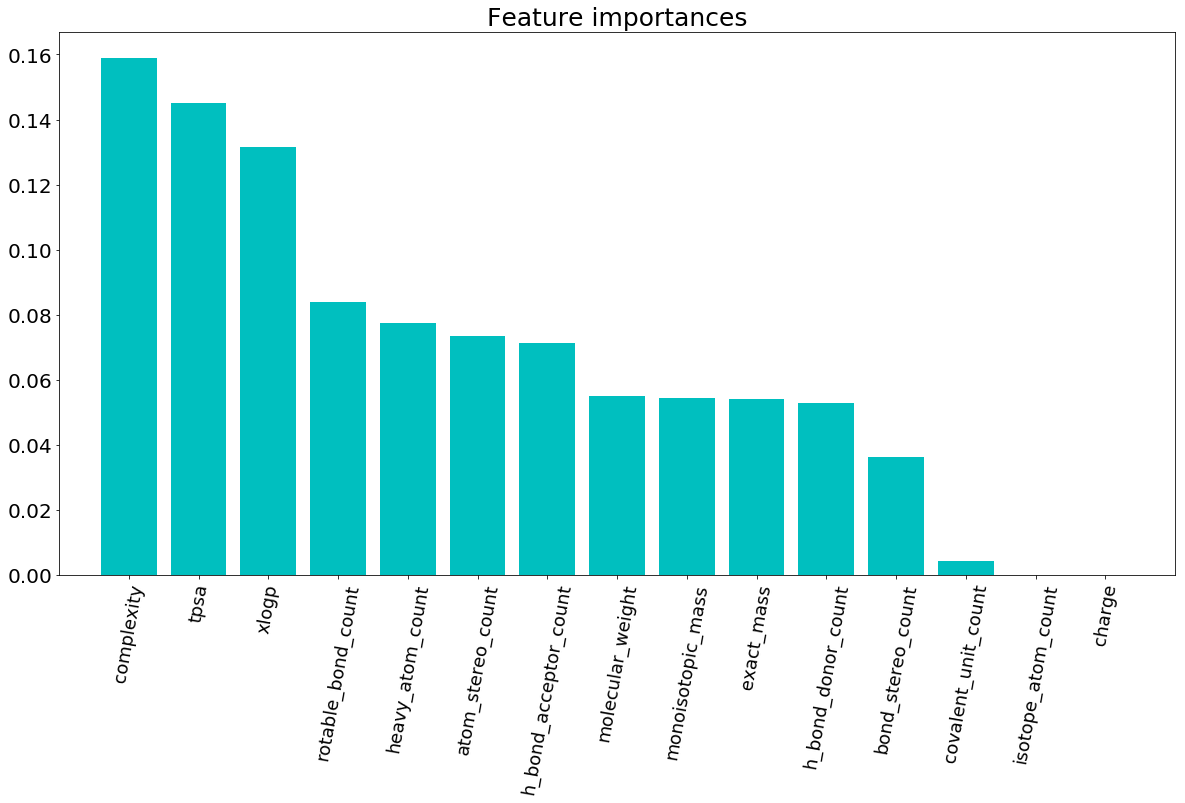

In [176]:
# Plot the feature importances of the forest
shape = len(fts)
plt.figure(figsize = (20,10))
plt.title("Feature importances", fontsize = 25)
plt.bar(range(shape), importances[indices[0:shape]],
       color="c", align="center")
plt.xticks(range(shape), fts[indices[0:shape]], rotation=80, fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlim([-1, shape])
plt.show()

In [177]:
#!pip3 install pydot
import pydot
from sklearn import *

In [179]:
tree.export_graphviz(clf.estimators_[0], out_file='Tree1.dot', feature_names=fts)
(graph,) = pydot.graph_from_dot_file('Tree1.dot')
graph.write_png('tree1.png')

tree.export_graphviz(clf.estimators_[1], out_file='Tree2.dot', feature_names=fts)
(graph,) = pydot.graph_from_dot_file('Tree2.dot')
graph.write_png('tree2.png')

tree.export_graphviz(clf.estimators_[2], out_file='Tree3.dot', feature_names=fts)
(graph,) = pydot.graph_from_dot_file('Tree3.dot')
graph.write_png('tree3.png')

tree.export_graphviz(clf.estimators_[3], out_file='Tree4.dot', feature_names=fts)
(graph,) = pydot.graph_from_dot_file('Tree4.dot')
graph.write_png('tree4.png')

In [183]:
clf = RandomForestRegressor(n_estimators=1000, random_state=0, oob_score = True)
clf.fit(train_ft_resp, train_lab_resp)  
y_pred=clf.predict(test_ft_resp)
print("Prediction metrics")
compute_regression_metrics(test_lab_resp, y_pred)

Prediction metrics
R2:  0.14134666769395177
MAE:  26.435405920408378
MSE:  1056.9446244560556
Explained Variance:  0.14273825245820038


In [ ]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
fts = counts.columns

In [ ]:
# Print the feature ranking
print("Feature ranking:")

for f in range(300):
    print("%d. %s has feature importance %f" % (f + 1, genes[indices[f]], importances[indices[f]]))

In [ ]:
# Plot the feature importances of the forest
shape = 50
plt.figure(figsize = (20,10))
plt.title("Feature importances", fontsize = 25)
plt.bar(range(shape), importances[indices[0:shape]],
       color="c", align="center")
plt.xticks(range(shape), fts[indices[0:shape]], rotation=80, fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlim([-1, shape])
plt.show()

In [ ]:
tree.export_graphviz(clf.estimators_[0], out_file='Tree5.dot', feature_names=fts)
(graph,) = pydot.graph_from_dot_file('Tree5.dot')
graph.write_png('tree5.png')

tree.export_graphviz(clf.estimators_[1], out_file='Tree6.dot', feature_names=gene_names)
(graph,) = pydot.graph_from_dot_file('Tree6.dot')
graph.write_png('tree6.png')

tree.export_graphviz(clf.estimators_[2], out_file='Tree7.dot', feature_names=gene_names)
(graph,) = pydot.graph_from_dot_file('Tree7.dot')
graph.write_png('tree7.png')

tree.export_graphviz(clf.estimators_[3], out_file='Tree8.dot', feature_names=gene_names)
(graph,) = pydot.graph_from_dot_file('Tree8.dot')
graph.write_png('tree8.png')

## Part B: KNN Regressor

In [92]:
knn = KNeighborsRegressor(algorithm = 'ball_tree')
knn.fit(train_ft_auc, train_lab_auc) 
y_pred = knn.predict(test_ft_auc)
print("Prediction metrics")
compute_regression_metrics(test_lab_auc, y_pred)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
knn = KNeighborsRegressor(algorithm = 'ball_tree')
knn.fit(train_ft_resp, train_lab_resp) 
y_pred = knn.predict(test_ft_resp)
print("Prediction metrics")
compute_regression_metrics(test_lab_resp, y_pred)

## Part C: Linear Support Vector Regressor

In [ ]:
#clf = LinearSVC(random_state=0, max_iter=5000)
clf = LinearSVR(random_state=0, max_iter=1000)
clf.fit(train_ft_auc, train_lab_auc) 
y_pred = knn.predict(test_ft_auc)
print("Prediction metrics")
compute_regression_metrics(test_lab_auc, y_pred)

In [ ]:
#clf = LinearSVC(random_state=0, max_iter=5000)
clf = LinearSVR(random_state=0, max_iter=1000)
clf.fit(train_ft_resp, train_lab_resp) 
y_pred = knn.predict(test_ft_resp)
print("Prediction metrics")
compute_regression_metrics(test_lab_resp, y_pred)